**DEEP LEARNING COURSE PROJECT - IMAGE CLASSIFICATION**

**A GANESH AADHITHYA**

SCDS

email: ganeshaadhithya.a-26@scds.saiuniversity.edu.in

Dataset: Airplanes, Motorbikes & Schooners

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install tensorflow==2.15

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 475.2/475.2 MB 3.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 53.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 53.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 68.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 442.0/442.0 kB 35.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 8.4 MB/s eta 0:00:00
  Attempting uninstall: wrapt
    Found existing installation: wrapt 1.17.0
    Uninstalling wrapt-1.17.0:
      Successfully uninstalled wrapt-1.17.0
  Attempting uninstall: ml-dtypes
    Found existing installation: ml-dtypes 0.4.1
    Uninstalling ml-dtypes-0.4.1:
      Successfully uninstalled ml-dtypes-0.4.1
  Attempting uninstall: keras
    Found existing installation: keras 3.5.0
    Uninstalling keras-3.5.0:
      Successfully uninstalled keras-3.5.0
  Attempting uninstall: tensorboard
    Found existing installation

In [ ]:
import tensorflow as tf
print(tf.__version__)

from tensorflow import keras
tf.random.set_seed(42)

import numpy as np
np.random.seed(42)

import matplotlib.pyplot as plt
%matplotlib inline

2.15.0


In [ ]:
from numpy import load

X_train_std = load('/content/drive/MyDrive/Models/X_train_std.npy')
X_test_std = load('/content/drive/MyDrive/Models/X_test_std.npy')

y_train = load('/content/drive/MyDrive/Models/y_train.npy')
y_test = load('/content/drive/MyDrive/Models/y_test.npy')

In [ ]:
print("X_train_std_shape: {}".format(X_train_std.shape))
print("X_test_std_shape: {}".format(X_test_std.shape))

X_train_std_shape: (459, 299, 299, 3)
X_test_std_shape: (154, 299, 299, 3)


#Model1_FineTuning - Xception

In [ ]:
# Loading the saved best model

model1_FT = keras.models.load_model('/content/drive/MyDrive/Models/01_Xception_TransferLearning_Best_Model.h5')

In [ ]:
model1_FT.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_2 (InputLayer)        [(None, None, None, 3)]      0         []                            
                                                                                                  
 block1_conv1 (Conv2D)       (None, None, None, 32)       864       ['input_2[0][0]']             
                                                                                                  
 block1_conv1_bn (BatchNorm  (None, None, None, 32)       128       ['block1_conv1[0][0]']        
 alization)                                                                                       
                                                                                                  
 block1_conv1_act (Activati  (None, None, None, 32)       0         ['block1_conv1_bn[0][0]'] 

In [ ]:
print(len(model1_FT.layers))
print(int(0.25*(len(model1_FT.layers))))

136
34


In [ ]:
#Setting the trainable and non-trainable layers
for layer in model1_FT.layers[:int(0.25*(len(model1_FT.layers)))]:
    layer.trainable = False
for layer in model1_FT.layers[int(0.25*(len(model1_FT.layers))):]:
    layer.trainable = True

In [ ]:
model1_FT.compile(loss='sparse_categorical_crossentropy',
                      optimizer='adam',
                      metrics=['accuracy'])
callbacks_FineTune = [
    keras.callbacks.ModelCheckpoint("bestFT.h5",
                                    monitor='val_accuracy',
                                    save_weights_only=True,
                                    save_best_only=True)
]
history_FineTune = model1_FT.fit(x=X_train_std, y=y_train, epochs=10,
                                      validation_split=0.1, batch_size=16, callbacks=callbacks_FineTune)

Epoch 1/10
26/26 [==============================] - 43s 618ms/step - loss: 0.1143 - accuracy: 0.9806 - val_loss: 0.0011 - val_accuracy: 1.0000
Epoch 2/10
26/26 [==============================] - 8s 294ms/step - loss: 0.0869 - accuracy: 0.9782 - val_loss: 8.0036 - val_accuracy: 0.5217
Epoch 3/10
26/26 [==============================] - 7s 284ms/step - loss: 0.0776 - accuracy: 0.9734 - val_loss: 7.9951 - val_accuracy: 0.4348
Epoch 4/10
26/26 [==============================] - 8s 300ms/step - loss: 0.0544 - accuracy: 0.9831 - val_loss: 0.0076 - val_accuracy: 1.0000
Epoch 5/10
26/26 [==============================] - 7s 287ms/step - loss: 0.0402 - accuracy: 0.9855 - val_loss: 0.0664 - val_accuracy: 0.9783
Epoch 6/10
26/26 [==============================] - 8s 302ms/step - loss: 0.0018 - accuracy: 1.0000 - val_loss: 0.0286 - val_accuracy: 1.0000
Epoch 7/10
26/26 [==============================] - 8s 291ms/step - loss: 0.0025 - accuracy: 1.0000 - val_loss: 0.0183 - val_accuracy: 1.0000
Epoch

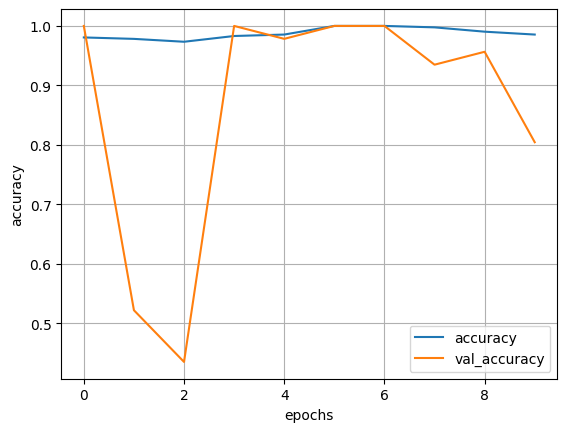

In [ ]:
#Accuracy plot for the model
keys = ['accuracy', 'val_accuracy']
progress = {k:v for k,v in history_FineTune.history.items() if k in keys}

import pandas as pd
pd.DataFrame(progress).plot()

plt.xlabel("epochs")
plt.ylabel("accuracy")

plt.grid(True)
plt.show()

In [ ]:
testLoss_FineTune, testAccuracy_FineTune = model1_FT.evaluate(x = X_test_std, y = y_test)
print("Test-loss: %f, Test-accuracy: %f" % (testLoss_FineTune, testAccuracy_FineTune))

5/5 [==============================] - 11s 1s/step - loss: 2.5513 - accuracy: 0.8182
Test-loss: 2.551284, Test-accuracy: 0.818182


In [ ]:
model1_FT.load_weights("bestFT.h5")
testLoss_FineTune, testAccuracy_FineTune = model1_FT.evaluate(x = X_test_std, y = y_test)
print("Test-loss: %f, Test-accuracy: %f" % (testLoss_FineTune, testAccuracy_FineTune))

5/5 [==============================] - 1s 212ms/step - loss: 0.0251 - accuracy: 0.9870
Test-loss: 0.025126, Test-accuracy: 0.987013


In [ ]:
y_proba = model1_FT.predict(X_test_std)
y_predict = np.argmax(y_proba, axis=-1)
print(y_predict)

5/5 [==============================] - 2s 238ms/step
[2 1 1 1 0 0 1 1 1 1 0 0 0 0 0 0 1 0 0 1 0 0 0 1 1 1 1 1 0 0 1 0 0 0 1 1 1
 1 0 1 0 1 2 0 1 0 0 0 0 1 0 1 0 1 0 0 0 1 1 2 0 1 1 0 1 1 1 0 1 0 1 1 1 1
 0 1 0 1 0 0 1 0 1 0 1 2 2 0 0 1 0 0 0 0 1 1 0 1 1 1 1 1 0 1 2 1 1 0 1 0 1
 0 1 0 1 1 0 1 0 2 1 2 0 0 0 0 0 0 0 1 1 1 1 0 2 2 1 0 1 0 2 2 1 2 1 1 0 0
 0 1 2 1 0 0]


##Confusion Matrix

In [ ]:
#Confusion Matrix for Model1_FT
from sklearn.metrics import confusion_matrix
confusion_matrix(y_true = y_test, y_pred = y_predict)

array([[69,  0,  0],
       [ 0, 69,  0],
       [ 0,  2, 14]])

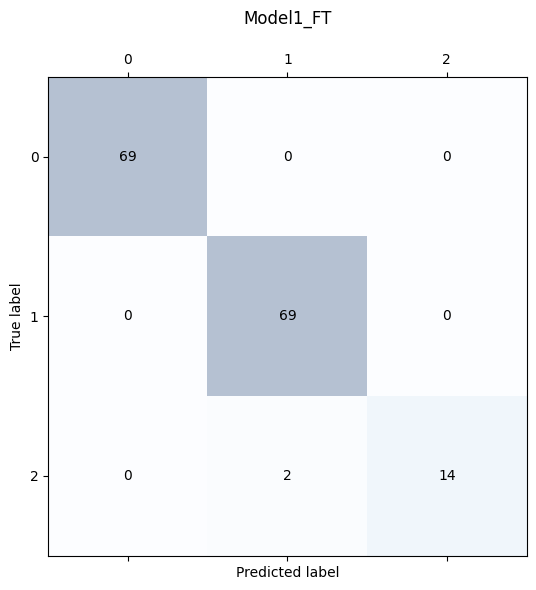

In [ ]:
cm = confusion_matrix(y_true = y_test, y_pred = y_predict)

fig, ax = plt.subplots(figsize=(6, 6))
ax.matshow(cm, cmap=plt.cm.Blues, alpha=0.3)

for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(x=j, y=i, s=cm[i, j], va='center', ha='center')

ax.title.set_text('Model1_FT\n')
plt.xlabel('Predicted label')
plt.ylabel('True label')

plt.tight_layout()
plt.savefig("ConfusionMatrix_Model1_FT.png", dpi=300, format='png', pad_inches=0.3)
plt.show()



##Precision, Recall and F1-Score

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score

pScore = precision_score(y_true= y_test, y_pred = y_predict, average = 'weighted')
print("Precision: ", pScore)

rScore = recall_score(y_true= y_test, y_pred = y_predict, average = 'weighted')
print("Recall: ", rScore)

fScore = f1_score(y_true= y_test, y_pred = y_predict, average = 'weighted')
print("F1-score: ", fScore)

print("\n\n\n")

Precision:  0.987378818364734
Recall:  0.987012987012987
F1-score:  0.9866728509585654






In [ ]:
# Saving the best model obtained
model1_FT.save('/content/drive/MyDrive/Models/02_Xception_FineTuned_Best_Model.h5')
print("Model saved as '02_Xception_FineTuned_Best_Model.h5'")

Model saved as '02_Xception_FineTuned_Best_Model.h5'
